Dataset : https://www.kaggle.com/datasets/adammaus/predicting-churn-for-bank-customers

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Preprocessing

In [14]:
df = pd.read_csv('Churn_Modelling.csv')
df

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


In [15]:
df.shape

(10000, 14)

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [17]:
# cek tipe data kategorikal
print(df.select_dtypes(include='object').columns)
print(len(df.select_dtypes(include='object').columns))

Index(['Surname', 'Geography', 'Gender'], dtype='object')
3


In [18]:
# cek tipe data numerikal
print(df.select_dtypes(include=['int64', 'float64']).columns)
print(len(df.select_dtypes(include=['int64', 'float64']).columns))

Index(['RowNumber', 'CustomerId', 'CreditScore', 'Age', 'Tenure', 'Balance',
       'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary',
       'Exited'],
      dtype='object')
11


In [19]:
#statistical summary
df.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


## Missing Values

In [20]:
df.isnull().values.sum()

0

# Encode categorical data

In [21]:
df.select_dtypes(include='object').columns

Index(['Surname', 'Geography', 'Gender'], dtype='object')

In [22]:
# Delete irrelevant column RowNumber	CustomerId	Surname
df = df.drop(columns=['RowNumber',	'CustomerId',	'Surname'])


In [23]:
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [24]:
df['Geography'].unique()

array(['France', 'Spain', 'Germany'], dtype=object)

In [25]:
df['Gender'].unique()

array(['Female', 'Male'], dtype=object)

In [26]:
df.groupby('Geography').mean()

<ipython-input-26-e205bdccfeb1>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df.groupby('Geography').mean()


,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
Geography,,,,,,,,,
France,649.668329,38.511767,5.004587,62092.636516,1.530913,0.706621,0.516753,99899.180814,0.161548
Germany,651.453567,39.771622,5.009964,119730.116134,1.519729,0.713830,0.497409,101113.435102,0.324432
Spain,651.333872,38.890997,5.032297,61818.147763,1.539362,0.694792,0.529673,99440.572281,0.166734


In [27]:
df.groupby('Gender').mean()

<ipython-input-27-1bea18cda63a>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df.groupby('Gender').mean()


,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
Gender,,,,,,,,,
Female,650.831389,39.238389,4.966102,75659.369139,1.544134,0.702619,0.502751,100601.541382,0.250715
Male,650.276892,38.658237,5.051677,77173.974506,1.518600,0.707898,0.525380,99664.576931,0.164559


In [28]:
# One hot encoding
df = pd.get_dummies(data=df, drop_first=True)

In [29]:
df

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain,Gender_Male
0,619,42,2,0.00,1,1,1,101348.88,1,0,0,0
1,608,41,1,83807.86,1,0,1,112542.58,0,0,1,0
2,502,42,8,159660.80,3,1,0,113931.57,1,0,0,0
3,699,39,1,0.00,2,0,0,93826.63,0,0,0,0
4,850,43,2,125510.82,1,1,1,79084.10,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
9995,771,39,5,0.00,2,1,0,96270.64,0,0,0,1
9996,516,35,10,57369.61,1,1,1,101699.77,0,0,0,1
9997,709,36,7,0.00,1,0,1,42085.58,1,0,0,0
9998,772,42,3,75075.31,2,1,0,92888.52,1,1,0,1


## countplot


<function matplotlib.pyplot.plot(*args, scalex=True, scaley=True, data=None, **kwargs)>

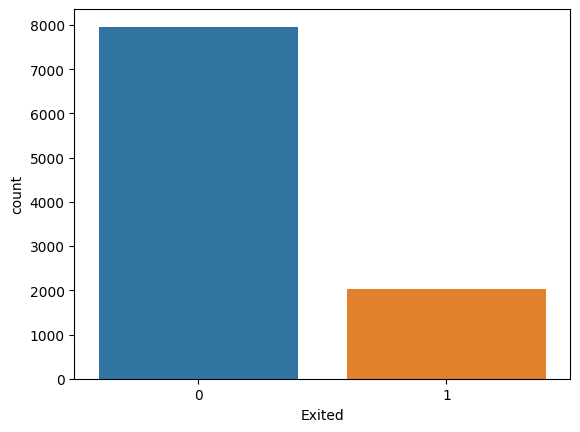

In [30]:
sns.countplot(x='Exited', data=df)
plt.plot

In [31]:
# Orang yang stay
(df.Exited == 0).sum()

7963

In [32]:
# orang yang exit
(df.Exited == 1).sum()

2037

## Correlation & Heatmap

In [33]:
df_2 = df.drop(columns='Exited')

<Axes: title={'center': 'Correlation with Exited'}>

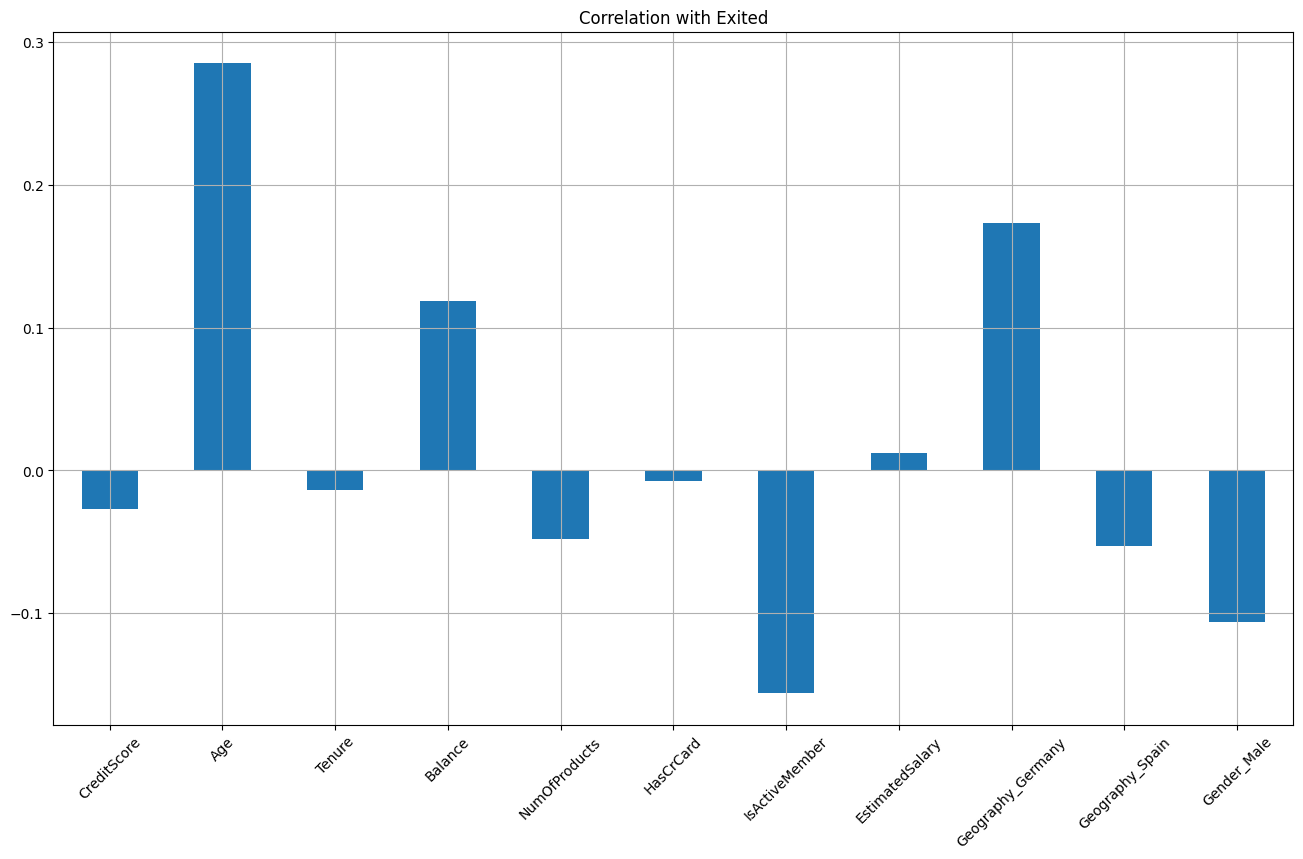

In [34]:
df_2.corrwith(df['Exited']).plot.bar(
    figsize=(16,9), title = 'Correlation with Exited', rot=45, grid=True
)

In [35]:
corr = df.corr()

<Axes: >

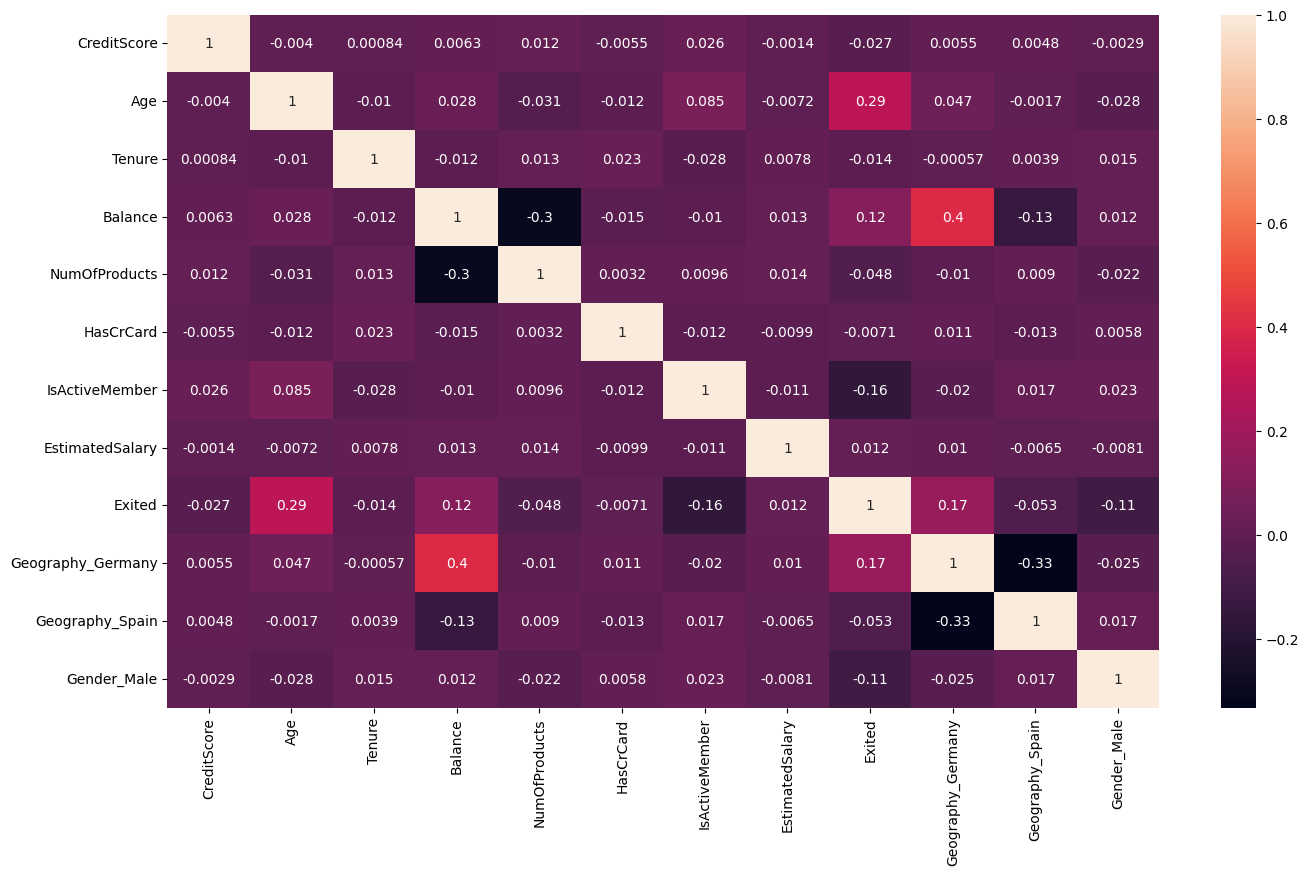

In [36]:
plt.figure(figsize=(16,9))
sns.heatmap(corr, annot=True)

## Split Data

In [37]:
x = df.drop(columns='Exited')

In [38]:
y = df['Exited']

In [39]:
from sklearn.model_selection import train_test_split

In [40]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2, random_state=0)

In [41]:
x_train.shape

(8000, 11)

In [42]:
x_test.shape

(2000, 11)

In [43]:
y_train.shape

(8000,)

In [44]:
y_test.shape

(2000,)

## Feature Scaling

In [45]:
from sklearn.preprocessing import StandardScaler

In [46]:
sc = StandardScaler()

In [47]:
scal_x_train = sc.fit_transform(x_train)
scal_x_test = sc.transform(x_test)



In [48]:
scal_x_train

array([[ 0.16958176, -0.46460796,  0.00666099, ..., -0.5698444 ,
         1.74309049, -1.09168714],
       [-2.30455945,  0.30102557, -1.37744033, ...,  1.75486502,
        -0.57369368,  0.91601335],
       [-1.19119591, -0.94312892, -1.031415  , ..., -0.5698444 ,
        -0.57369368, -1.09168714],
       ...,
       [ 0.9015152 , -0.36890377,  0.00666099, ..., -0.5698444 ,
        -0.57369368,  0.91601335],
       [-0.62420521, -0.08179119,  1.39076231, ..., -0.5698444 ,
         1.74309049, -1.09168714],
       [-0.28401079,  0.87525072, -1.37744033, ...,  1.75486502,
        -0.57369368, -1.09168714]])

In [49]:
scal_x_test

array([[-0.55204276, -0.36890377,  1.04473698, ...,  1.75486502,
        -0.57369368, -1.09168714],
       [-1.31490297,  0.10961719, -1.031415  , ..., -0.5698444 ,
        -0.57369368, -1.09168714],
       [ 0.57162971,  0.30102557,  1.04473698, ..., -0.5698444 ,
         1.74309049, -1.09168714],
       ...,
       [-0.74791227, -0.27319958, -1.37744033, ..., -0.5698444 ,
         1.74309049,  0.91601335],
       [-0.00566991, -0.46460796, -0.33936434, ...,  1.75486502,
        -0.57369368,  0.91601335],
       [-0.79945688, -0.84742473,  1.04473698, ...,  1.75486502,
        -0.57369368,  0.91601335]])

# Modelling

## Logistic Regression

In [50]:
from sklearn.linear_model import LogisticRegression

In [51]:
classifier_lr = LogisticRegression(random_state=0)

In [52]:
classifier_lr.fit(scal_x_train, y_train)

LogisticRegression(random_state=0)

In [53]:
y_pred = classifier_lr.predict(scal_x_test)

In [54]:
from sklearn.metrics import accuracy_score, confusion_matrix, f1_score, precision_score, recall_score

In [55]:
acc = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
prec = precision_score(y_test, y_pred)
rec = recall_score(y_test, y_pred)

In [56]:
result = pd.DataFrame([['Logistic Regression', acc, f1, prec, rec]],
                      columns = ['Model', 'Accuracy', 'F1 Score', 'Precision', 'Recall'])
result

,Model,Accuracy,F1 Score,Precision,Recall
0,Logistic Regression,0.811,0.336842,0.581818,0.237037


In [57]:
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[1526   69]
 [ 309   96]]


### Cross Validation

In [58]:
from sklearn.model_selection import cross_val_score

In [59]:
accuracies = cross_val_score(estimator = classifier_lr, X = scal_x_train, y = y_train, cv=10)

In [60]:
print("Accuracy : {:.2f}%".format(accuracies.mean()*100))

Accuracy : 80.84%


## Random Forest

In [61]:
from sklearn.ensemble import RandomForestClassifier

In [62]:
classifier_rf = RandomForestClassifier(random_state=0)
classifier_rf.fit(scal_x_train, y_train)

RandomForestClassifier(random_state=0)

In [63]:
y_pred = classifier_rf.predict(scal_x_test)

In [64]:
acc = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
prec = precision_score(y_test, y_pred)
rec = recall_score(y_test, y_pred)

In [65]:
model_result = pd.DataFrame([['Random Forest', acc, f1, prec, rec]],
                      columns = ['Model', 'Accuracy', 'F1 Score', 'Precision', 'Recall'])
result = result.append(model_result, ignore_index=True)

<ipython-input-65-4437a28e8197>:3: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  result = result.append(model_result, ignore_index=True)


In [66]:
result

,Model,Accuracy,F1 Score,Precision,Recall
0,Logistic Regression,0.811,0.336842,0.581818,0.237037
1,Random Forest,0.867,0.613372,0.745583,0.520988


### Cross Validation

In [67]:
accuracies = cross_val_score(estimator = classifier_rf, X = scal_x_train, y = y_train, cv=10)

In [68]:
print("Accuracy : {:.2f}%".format(accuracies.mean()*100))

Accuracy : 85.96%


## XGBoost

In [69]:
from xgboost import XGBClassifier
classifier_xgb = XGBClassifier()
classifier_xgb.fit(scal_x_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

In [70]:
y_pred = classifier_xgb.predict(scal_x_test)

In [71]:
acc = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
prec = precision_score(y_test, y_pred)
rec = recall_score(y_test, y_pred)

In [72]:
model_result = pd.DataFrame([['XGB Classifier', acc, f1, prec, rec]],
                      columns = ['Model', 'Accuracy', 'F1 Score', 'Precision', 'Recall'])
result = result.append(model_result, ignore_index=True)

<ipython-input-72-c4f7ce9e66e2>:3: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  result = result.append(model_result, ignore_index=True)


In [73]:
result

,Model,Accuracy,F1 Score,Precision,Recall
0,Logistic Regression,0.8110,0.336842,0.581818,0.237037
1,Random Forest,0.8670,0.613372,0.745583,0.520988
2,XGB Classifier,0.8545,0.599725,0.677019,0.538272


### Cross Validation

In [74]:
accuracies = cross_val_score(estimator = classifier_xgb, X = scal_x_train, y = y_train, cv=10)

In [75]:
print("Accuracy : {:.2f}%".format(accuracies.mean()*100))

Accuracy : 85.24%


## Randomized Search to find the best parameters (XGB Classifier)

In [76]:
from sklearn.model_selection import RandomizedSearchCV

In [77]:
parameters = {
    'learning_rate':[0.05, 0.10, 0.15, 0.20, 0.25, 0.30],
    'max_depth': [3,4,5,6,7,8,10,12,15],
    'min_child_weight' : [1,3,5,7],
    'gamma' : [0.0, 0.1, 0.2, 0.3, 0.4],
    'colsample_bytree' : [0.3,0.4,0.5,0.7]
}

In [78]:
parameters

{'learning_rate': [0.05, 0.1, 0.15, 0.2, 0.25, 0.3],
 'max_depth': [3, 4, 5, 6, 7, 8, 10, 12, 15],
 'min_child_weight': [1, 3, 5, 7],
 'gamma': [0.0, 0.1, 0.2, 0.3, 0.4],
 'colsample_bytree': [0.3, 0.4, 0.5, 0.7]}

In [79]:
random_search = RandomizedSearchCV(estimator=classifier_xgb, param_distributions=parameters, n_iter=5,
                                   scoring='roc_auc', n_jobs = -1, cv=5, verbose=3)

In [80]:
random_search.fit(scal_x_train, y_train)

Fitting 5 folds for each of 5 candidates, totalling 25 fits


RandomizedSearchCV(cv=5,
                   estimator=XGBClassifier(base_score=None, booster=None,
                                           callbacks=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None,
                                           early_stopping_rounds=None,
                                           enable_categorical=False,
                                           eval_metric=None, feature_types=None,
                                           gamma=None, gpu_id=None,
                                           grow_policy=None,
                                           importance_type=None,
                                           interaction_constraints=None,
                                           learning_rate...
                                           monotone_constraints=None,
                                           n_estimators=100, n_jobs=None,
                                           num_parallel_tree=None,
                                           predictor=None, random_state=None, ...),
                   n_iter=5, n_jobs=-1,
                   param_distributions={'colsample_bytree': [0.3, 0.4, 0.5,
                                                             0.7],
                                        'gamma': [0.0, 0.1, 0.2, 0.3, 0.4],
                                        'learning_rate': [0.05, 0.1, 0.15, 0.2,
                                                          0.25, 0.3],
                                        'max_depth': [3, 4, 5, 6, 7, 8, 10, 12,
                                                      15],
                                        'min_child_weight': [1, 3, 5, 7]},
                   scoring='roc_auc', verbose=3)

In [81]:
random_search.best_estimator_

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.5, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=0.1, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.05, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=5, max_leaves=None,
              min_child_weight=3, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

In [82]:
random_search.best_score_

0.8652003022128755

In [83]:
random_search.best_params_

{'min_child_weight': 3,
 'max_depth': 5,
 'learning_rate': 0.05,
 'gamma': 0.1,
 'colsample_bytree': 0.5}

## Final Model

In [85]:
classifier_final = XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.5, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=0.1, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.05, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=5, max_leaves=None,
              min_child_weight=3, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None)
classifier_final.fit(scal_x_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.5, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=0.1, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.05, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=5, max_leaves=None,
              min_child_weight=3, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

In [86]:
y_pred = classifier_final.predict(scal_x_test)

In [87]:
acc = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
prec = precision_score(y_test, y_pred)
rec = recall_score(y_test, y_pred)

In [88]:
model_result = pd.DataFrame([['XGB Final', acc, f1, prec, rec]],
                      columns = ['Model', 'Accuracy', 'F1 Score', 'Precision', 'Recall'])
result = result.append(model_result, ignore_index=True)

<ipython-input-88-72c201961dae>:3: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  result = result.append(model_result, ignore_index=True)


In [89]:
result

,Model,Accuracy,F1 Score,Precision,Recall
0,Logistic Regression,0.8110,0.336842,0.581818,0.237037
1,Random Forest,0.8670,0.613372,0.745583,0.520988
2,XGB Classifier,0.8545,0.599725,0.677019,0.538272
3,XGB Final,0.8700,0.602446,0.791165,0.486420


In [90]:
accuracies = cross_val_score(estimator = classifier_final, X = scal_x_train, y = y_train, cv=10)

In [91]:
print("Accuracy : {:.2f}%".format(accuracies.mean()*100))

Accuracy : 86.25%


# Prediction

In [92]:
df.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain,Gender_Male
0,619,42,2,0.00,1,1,1,101348.88,1,0,0,0
1,608,41,1,83807.86,1,0,1,112542.58,0,0,1,0
2,502,42,8,159660.80,3,1,0,113931.57,1,0,0,0
3,699,39,1,0.00,2,0,0,93826.63,0,0,0,0
4,850,43,2,125510.82,1,1,1,79084.10,0,0,1,0


In [93]:
test_baru = [[764, 50, 4,90000, 3,1,1, 140000,0,0,1]]
test_baru

[[764, 50, 4, 90000, 3, 1, 1, 140000, 0, 0, 1]]

In [94]:
classifier_final.predict(sc.transform(test_baru))

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


array([1])